In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.pendulum import Pendulum

In [5]:
pendulum = Pendulum()
pendulum.state = np.array([0, 1])
pendulum.get_phase_acceleration_vector()

array([ 1. , -0.1])

In [30]:
ro = 2
bound = 2 * np.pi
rs = np.linspace(0, bound, np.ceil(bound * ro).astype(int))

points = []
for r in rs:
    length = 2 * np.pi * r
    points_num = ro * length
    thetas = np.linspace(0, 2 * np.pi, np.ceil(points_num).astype(int)+1)
    circle = []
    for theta in thetas:
        point = r * np.array([np.cos(theta), np.sin(theta)])
        circle.append(point)
    points.append(circle)

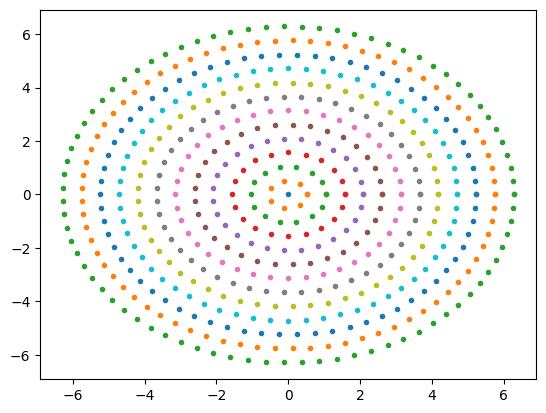

In [31]:
for circle in points:
    # print(circle)
    circle_ = np.array(circle)
    if len(circle_) > 0:
        plt.plot(circle_[:, 0], circle_[:, 1], '.')
plt.show()
